Task 1: Data Cleaning & Preprocessing (Titanic Dataset)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:

df = pd.read_csv("C:/Users/ADMIN/Downloads/archive/Titanic-Dataset.csv")

print(df.head())
print(df.info())
# Statistical summary
print(df.describe(include="all"))
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Missing Values

In [4]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin'], inplace=True)
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23976\3484716749.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23976\3484716749.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Categorical Variables

In [5]:
# Convert Gender/Sex to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

Normalization & Standardization

In [6]:
#scaling on Age and Fare
scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

df[['Age_norm', 'Fare_norm']] = scaler_norm.fit_transform(df[['Age', 'Fare']])
df[['Age_std', 'Fare_std']] = scaler_std.fit_transform(df[['Age', 'Fare']])

print(df[['Age', 'Age_norm', 'Age_std']].head())


    Age  Age_norm   Age_std
0  22.0  0.271174 -0.565736
1  38.0  0.472229  0.663861
2  26.0  0.321438 -0.258337
3  35.0  0.434531  0.433312
4  35.0  0.434531  0.433312


Outlier Detection & Removal

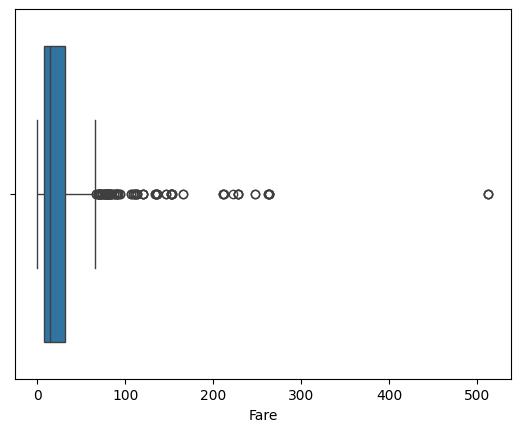

After removing outliers, shape = (775, 16)


In [7]:
# Boxplot
sns.boxplot(x=df['Fare'])
plt.show()

# Remove outliers using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print("After removing outliers, shape =", df.shape)


Saving Clean Datase

In [8]:
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0  22.0      1      0   
2                        Heikkinen, Miss. Laina    1  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                      Allen, Mr. William Henry    0  35.0      0      0   
5                              Moran, Mr. James    0  28.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  Age_norm  Fare_norm  \
0         A/5 21171   7.2500       False        True  0.271174   0.014151   
2  STON/O2. 3101282   7.9250       False        True  0.321438   0.015469   
3            113803  53.1000       False        True  0.434531   0.103644   
4            37345